# Clustering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Hierarchical Clustering

In [2]:
air= pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/7.Clustering/Airlines.csv")

In [3]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
#Dropping ID# and Award? Column as not contributing much
air = air.drop(["ID#","Award?"], axis=1)
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [6]:
# create function to normalize the values
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
# Normalized data frame
air_norm = norm_func(air)
air_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


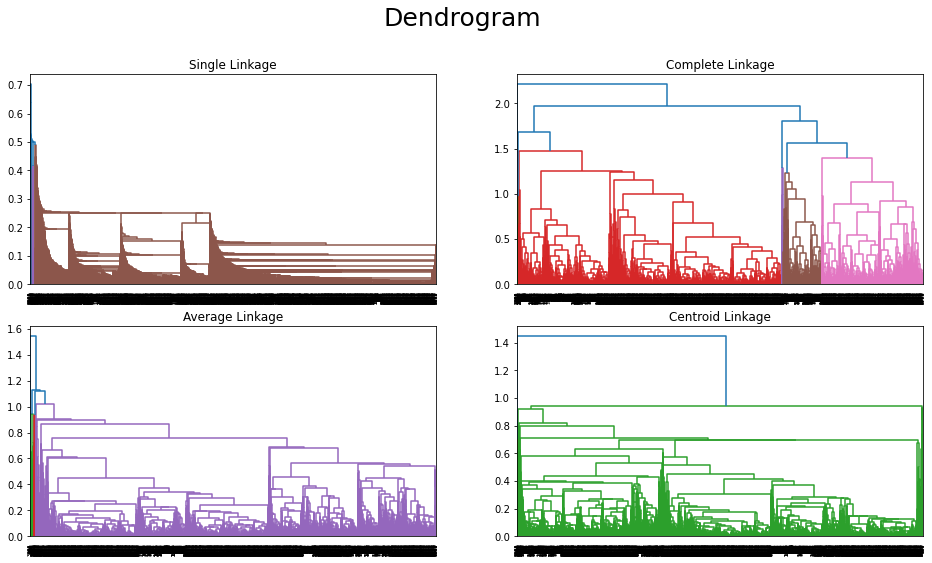

In [8]:
fig = plt.figure(figsize=(16,8.5))
plt.suptitle("Dendrogram", size=25, y=0.99)
plt.subplot(2,2,1)
dendrogram = sch.dendrogram(sch.linkage(air_norm, method="single"))
plt.title("Single Linkage")

plt.subplot(2,2,2)
dendrogram = sch.dendrogram(sch.linkage(air_norm, method="complete"))
plt.title("Complete Linkage")

plt.subplot(2,2,3)
dendrogram = sch.dendrogram(sch.linkage(air_norm, method="average"))
plt.title("Average Linkage")

plt.subplot(2,2,4)
dendrogram = sch.dendrogram(sch.linkage(air_norm, method="centroid"))
plt.title("Centroid Linkage");

In [9]:
# create 4 clusters using complete linkage
hc = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "complete") 

In [10]:
# segregating as per no. of cluster given and creating a data frame
y_hc = hc.fit_predict(air_norm)
Clusters=pd.DataFrame(y_hc,columns=["Clusters"])
Clusters.tail()

,Clusters
3994,0
3995,0
3996,2
3997,0
3998,0


In [11]:
# creating a column of clusters 
air_norm["H_clusterid"] = hc.labels_
air_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,H_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,2


In [12]:
# adding the created column of clusters segregated to the original data set 
air["H_clusterid"] = hc.labels_
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,H_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,2


In [13]:
# mean values column wise for each cluster 
air.groupby("H_clusterid").agg(["mean"]).reset_index()

,H_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,55625.489827,141.643762,1.201152,1.021497,1.001152,5418.927447,7.699424,421.536660,1.272937,4085.983877
1,1,141021.000000,0.000000,3.642857,1.000000,4.142857,97132.785714,28.214286,378.571429,1.071429,4462.142857
2,2,106776.901163,149.668605,3.667151,1.001453,1.001453,38389.199128,18.653343,477.122093,1.428052,4182.311047
3,3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000


In [14]:
# no. of records in each cluster
air["H_clusterid"].value_counts()

0    2605
2    1376
1      14
3       4
Name: H_clusterid, dtype: int64

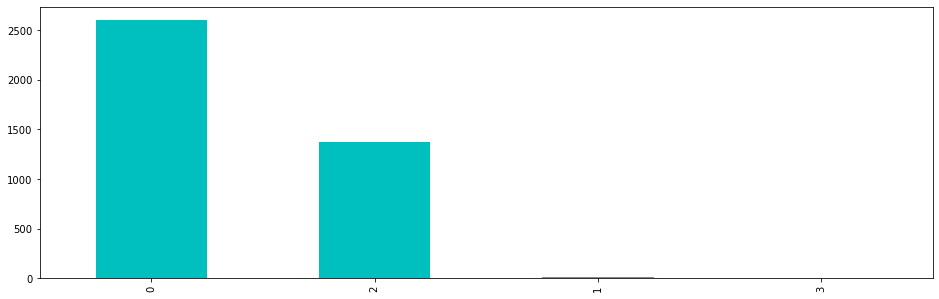

In [15]:
fig = plt.figure(figsize=(16,5))
air["H_clusterid"].value_counts().plot(kind="bar",color="c");

**Highest no. of records can be seen in 1st Cluster.**

# K-Means Clustering

In [16]:
air= pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/7.Clustering/Airlines.csv")

In [17]:
#Dropping ID# and Award? Column as not contributing much
air = air.drop(["ID#","Award?"], axis=1)
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [18]:
# function to Normalize data
scaler = StandardScaler()
air_norm= scaler.fit_transform(air)

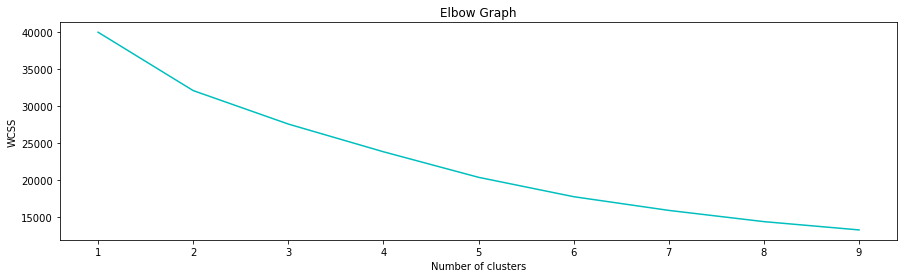

In [19]:
# Scree Plot
wcss = []  
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=50)
    kmeans.fit(air_norm)
    wcss.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15,4))   
plt.plot(range(1, 10), wcss,color="c")
plt.title("Elbow Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
# wcss(Within Cluster Sum of Squares) values for each no. of cluster
pd.DataFrame(wcss)

,0
0,39990.000000
1,32088.279700
2,27558.501552
3,23807.971298
4,20348.725038
5,17724.920505
6,15871.129656
7,14349.692585
8,13228.039659


**As per wcss values in Scree plot the optimal k=2,3,4**

In [21]:
# Build Cluster algorithm as per k-value (3)
air_clusters = KMeans(3, random_state=50)
air_clusters.fit(air_norm)

KMeans(n_clusters=3, random_state=50)

In [22]:
# Assign clusters to the data set by creating and adding it as new column to the orginal data
air["KM_clusterid"] = air_clusters.labels_
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,KM_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,2


In [23]:
# mean values column wise for each cluster 
air.groupby("KM_clusterid").agg(["mean"]).reset_index()

,KM_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,42818.232214,104.362910,1.176659,1.019984,1.000400,4385.217826,6.732614,212.553957,0.647882,3693.852118
1,1,196382.975460,795.263804,2.171779,1.036810,1.030675,31958.588957,27.404908,5402.368098,15.914110,4719.601227
2,2,116334.383058,139.107946,3.701649,1.001499,1.032234,39266.248126,18.803598,320.365067,0.958021,4841.683658


In [24]:
# no. of records in each cluster
air["KM_clusterid"].value_counts()

0    2502
2    1334
1     163
Name: KM_clusterid, dtype: int64

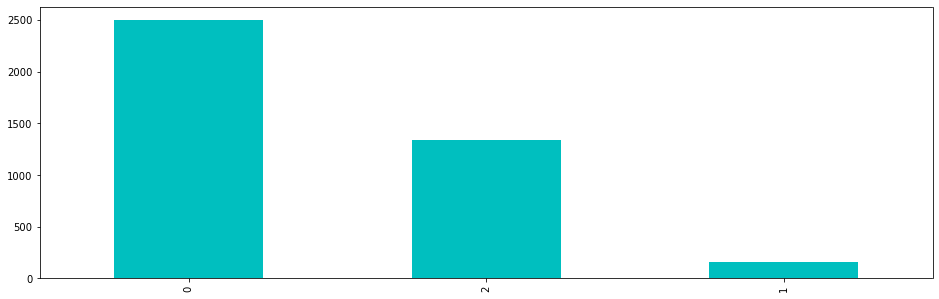

In [25]:
fig = plt.figure(figsize=(16,5))
air["KM_clusterid"].value_counts().plot(kind="bar",color="c");

**Highest No. of records can be seen in 1st and then 3rd Cluster.**

# DBSCAN Clustering

In [26]:
air= pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/7.Clustering/Airlines.csv")

In [27]:
# Dropping ID# and Award? Column as not contributing much
air = air.drop(["ID#","Award?"], axis=1)
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [28]:
# tranform to array so that we can apply scaling to the values
air_array=air.values
air_array

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

In [29]:
# scaling the values
stscaler = StandardScaler().fit(air_array)
air_norm = stscaler.transform(air_array)
air_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [30]:
# applying DBSCAN algo
dbscan = DBSCAN(eps=3, min_samples=12)
dbscan.fit(air_norm)

DBSCAN(eps=3, min_samples=12)

In [31]:
# Noisy samples are given the label -1.
a=pd.DataFrame(dbscan.labels_)
a.value_counts()

 0    3885
-1      75
 1      25
 2      14
dtype: int64

In [32]:
# Creating a DataFrame of these Cluster Value
air_cl=pd.DataFrame(dbscan.labels_,columns=["DB_clusterid"])
air_cl.tail()

,DB_clusterid
3994,0
3995,0
3996,0
3997,0
3998,0


In [33]:
# adding the cluster column to the original dataframe
air=pd.concat([air,air_cl],axis=1)
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,DB_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0


In [34]:
# List of Outliers 
np.where(air["DB_clusterid"]== -1)

(array([   8,   65,  106,  117,  126,  151,  186,  190,  220,  275,  307,
         343,  380,  384,  404,  410,  420,  466,  471,  481,  488,  510,
         531,  534,  561,  589,  622,  630,  662,  681,  702,  743,  833,
         850,  896,  901,  904,  958, 1036, 1177, 1220, 1244, 1300, 1529,
        1593, 1676, 1878, 1885, 1917, 1930, 1946, 2015, 2058, 2251, 2283,
        2364, 2413, 2605, 2656, 2696, 2709, 2840, 2853, 2955, 2999, 3146,
        3235, 3338, 3463, 3583, 3594, 3772, 3788, 3846, 3883], dtype=int64),)

In [35]:
# mean values column wise for each cluster 
air.groupby("DB_clusterid").agg(["mean"]).reset_index()

,DB_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,319478.613333,1651.946667,2.973333,1.066667,1.653333,69594.493333,29.946667,4708.853333,12.720000,5204.013333
1,0,69176.368855,116.452510,2.051737,1.000000,1.000000,16160.337452,11.207722,379.732046,1.157014,4100.208494
2,1,39187.040000,0.000000,1.120000,2.000000,1.000000,11107.040000,14.840000,224.000000,0.800000,3703.240000
3,2,45781.714286,0.000000,1.000000,3.000000,1.000000,20147.571429,16.928571,410.000000,1.714286,4137.642857


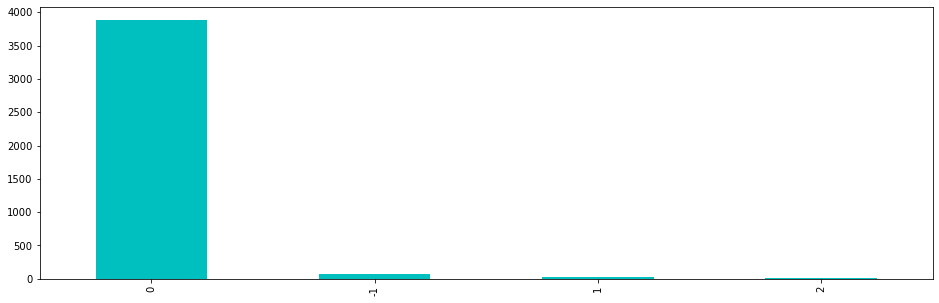

In [36]:
fig = plt.figure(figsize=(16,5))
air["DB_clusterid"].value_counts().plot(kind="bar",color="c");